In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
from numpy import NAN


In [13]:
#change object types to number
def convert1(s):
    dic = {}
    for i in s:
        if i not in dic:
            dic[i] = len(dic)
    box = []
    for i in s:
        box.append(dic[i])
    return box

#Data preprocessing
train_data = pd.read_csv("train.csv")
train_data = train_data.dropna()

test_data = pd.read_csv("test.csv")

for i in test_data.columns:
    test_data[test_data[i] == -999] = None
test_data=test_data.fillna(test_data.mean())

for i in train_data.columns:
    train_data = train_data[train_data[i] != -999]

train_data_df = train_data
test_data_df = test_data

test_id = test_data['Customer ID']

for i in train_data.columns:
    if train_data[i].dtype == 'object':
        train_data[i] = convert1(train_data[i])
        
for i in test_data.columns:
    if test_data[i].dtype == 'object':
        test_data[i] = convert1(test_data[i])

del train_data['Customer ID']
del train_data['Name']
del test_data['Customer ID']
del test_data['Name']

train_target = train_data.iloc[:, -1].to_numpy()
train_data = train_data.iloc[:, :-1].to_numpy()
test_data = test_data.to_numpy()

train_input, val_input, train_target, val_target = train_test_split(train_data, train_target, test_size = .2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
val_scaled = ss.transform(val_input)
test_scaled = ss.transform(test_data)


/var/folders/8x/lbk56ggd4j7cpypvcbtkp8kc0000gn/T/ipykernel_45330/2770815775.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data=test_data.fillna(test_data.mean())


# Visualization

In [14]:
model = LinearRegression()
model.fit(train_scaled, train_target)
print('score : ', model.score(val_scaled, val_target))

test_data_df['prediction_LinearRegression'] = model.predict(test_scaled)
#test_data_df.to_excel('linear.xlsx')

leg_result= pd.DataFrame({
    'Customer ID' : test_id,
    'Loan Amount' : test_data_df['prediction_LinearRegression'],
})
leg_result.to_csv('linear.csv')

print('r2 : ', sklearn.metrics.r2_score(model.predict(val_scaled), val_target))

score :  0.6094125675961137
r2 :  0.3691434867906166


In [15]:
print(train_data_df.columns)
print(model.coef_)

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Property ID', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Amount'],
      dtype='object')
[ 3.86725284e+02 -6.09917618e+02  7.59334368e+01 -1.81898940e-12
  4.03304378e+02  6.78796300e+01 -1.82510834e+02  2.78698801e+04
 -6.68116546e+02  1.42695889e+02  2.93316617e+02 -4.52255170e+02
  9.89943783e+03 -6.92679605e+02  1.71102743e+02 -1.15012053e+02
  7.59334368e+01 -7.15790217e+02  2.64185535e+02  1.50504457e+04
  2.17261472e+03]


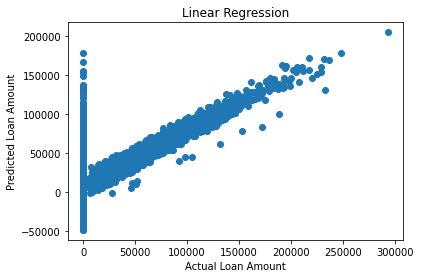

In [16]:
import matplotlib.pyplot as plt
plt.scatter(val_target, model.predict(val_scaled))
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Linear Regression")
plt.show()

In [17]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape = (21,), activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer = 'adam')

stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights = True)

history =  model.fit(train_scaled, train_target, epochs = 100, validation_data=(val_scaled, val_target), callbacks=[stopping])

box = []
for i in model.predict(test_scaled):
    box.append(i[0])

test_data_df['prediction_DNN'] = box

dnn_result= pd.DataFrame({
    'Customer ID' : test_id,
    'Loan Amount' : test_data_df['prediction_DNN']
})
dnn_result.to_csv('DNN.csv', index=False)

print('r2 : ', sklearn.metrics.r2_score(model.predict(val_scaled), val_target))

Epoch 1/100
330/330 [==============================] - 1s 2ms/step - loss: 4039598848.0000 - val_loss: 3943229440.0000
Epoch 2/100
330/330 [==============================] - 1s 2ms/step - loss: 3568313088.0000 - val_loss: 3054860800.0000
Epoch 3/100
330/330 [==============================] - 0s 1ms/step - loss: 2439162624.0000 - val_loss: 1805505792.0000
Epoch 4/100
330/330 [==============================] - 0s 1ms/step - loss: 1504884480.0000 - val_loss: 1178364928.0000
Epoch 5/100
330/330 [==============================] - 1s 2ms/step - loss: 1189465216.0000 - val_loss: 1007405504.0000
Epoch 6/100
330/330 [==============================] - 0s 1ms/step - loss: 1061693568.0000 - val_loss: 928260928.0000
Epoch 7/100
330/330 [==============================] - 0s 1ms/step - loss: 1019973504.0000 - val_loss: 877300096.0000
Epoch 8/100
330/330 [==============================] - 1s 2ms/step - loss: 938707712.0000 - val_loss: 838860800.0000
Epoch 9/100
330/330 [==============================]

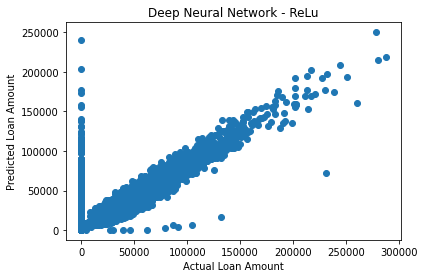

In [7]:
import matplotlib.pyplot as plt
plt.scatter(val_target, model.predict(val_scaled))
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Deep Neural Network - ReLu")

plt.show()

In [8]:
# result2 = pd.DataFrame({
#     'ID' : test_id,
#     'Linear' : test_data_df['prediction_LinearRegression'],
#     'DNN' : test_data_df['prediction_DNN']
# })
# result2.to_excel('Final_Result2.xlsx')
# result2

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2200      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,301
Trainable params: 7,301
Non-trainable params: 0
_________________________________________________________________


In [10]:
print(train_input.shape)
print(train_target.shape)
print(val_input.shape)
print(val_target.shape)

(10553, 21)
(10553,)
(2639, 21)
(2639,)


In [33]:
train_input=np.vstack((np.ones((train_input.shape[0],)),train_input.T)).T
val_input=np.vstack((np.ones((val_input.shape[0],)),val_input.T)).T

In [57]:
def linear_model (train_input,train_target,learning_rate,iteration):
    m=train_target.size
    theta=np.zeros((train_input.shape[1],1))
    cost_list=[]
    for i in range(iteration):
        y_pred=np.dot(train_input,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred-train_target))
        d_theta = (1/m)*np.dot(train_input.T,y_pred-train_target)
        theta = theta-learning_rate*d_theta
        cost_list.append(cost)
        if(i%(iteration/10)==0):
            print("Cost is:", cost)
    return theta,cost_list

In [58]:
iteration=int(10)
learning_rate =int(0.005)
theta, cost_list =linear_model(train_input,train_target,learning_rate=learning_rate, iteration=iteration)

Cost is: 21475844220744.965
Cost is: 21475844220744.965
Cost is: 21475844220744.965
Cost is: 21475844220744.965
Cost is: 21475844220744.965
Cost is: 21475844220744.965
Cost is: 21475844220744.965
Cost is: 21475844220744.965
Cost is: 21475844220744.965
Cost is: 21475844220744.965


In [59]:
y_pred=np.dot(val_input,theta)
print(y_pred.shape)
print(val_target.shape)
error=(1/val_input.shape[0])*np.sum(np.abs(y_pred-val_target))
print("error is:",error*100,"%")

(2639, 10553)
(2639,)


ValueError: operands could not be broadcast together with shapes (2639,10553) (2639,) 